# Python Tools

The ``AggScatVIR`` package provides some python tools. Using the python tools, you can quickly look into the optical properties of dust particles in this database. This notebook explains the basic usage of the tools.

## Basic Usage
The first step is to import a necessary module:

In [1]:
from aggscatpy import *

### Reading aggregate models

For example, let's suppose you would like to see the optical properties of high-porosity compact aggregates ``CAHP`` consisting of 4096 monomers of a radius of 100 nm with the ``amc`` composition. In this case, you need to type

In [2]:
a=dustmodel(partype='CAHP',size='4096',amon='100nm',comp='amc')

This will create an instance ``a``, which contains the information of the dust model specified in the arguments. Once you have created an instance, you can extract the physical and optical properties of the dust model as well as some auxiliary information by using its attributes. 

For example, you can find a relative path to the file we've read, you can use the `path` attribute:

In [3]:
a.path

'../aggscatrt/distave/nochop/dustkapscatmat_CAHP_Nmax4096_100nm_amc.inp'

If you are interested in the phyiscal quantities of the dust model, such as radius and porosity, you can use the `dustspec()` method:

In [4]:
a.dustspec()

=============== Dust Parameters ===============
Model name = CAHP_Nmax4096_100nm_amc.inp
Monomer radius           (um) = 0.10000 
Material density       (g/cc) = 1.7779 
-----Minimum aggregate in the distribution-----
Number of monomers            = 8    
Volume-eq radius         (um) = 2.00000e-01
Characteristic radius    (um) = 3.25143e-01
Porosity                  (%) = 76.73  
-----Maximum aggregate in the distribution-----
Number of monomers            = 4096 
Volume-eq radius         (um) = 1.60000e+00
Characteristic radius    (um) = 3.14402e+00
Porosity                  (%) = 86.82  
-----------------------------------------------
Power-law index of size dist. = 3.50000e+00


If you want to check what the optical properties look like, the ``showmodel`` method will create quick overview plots for you.

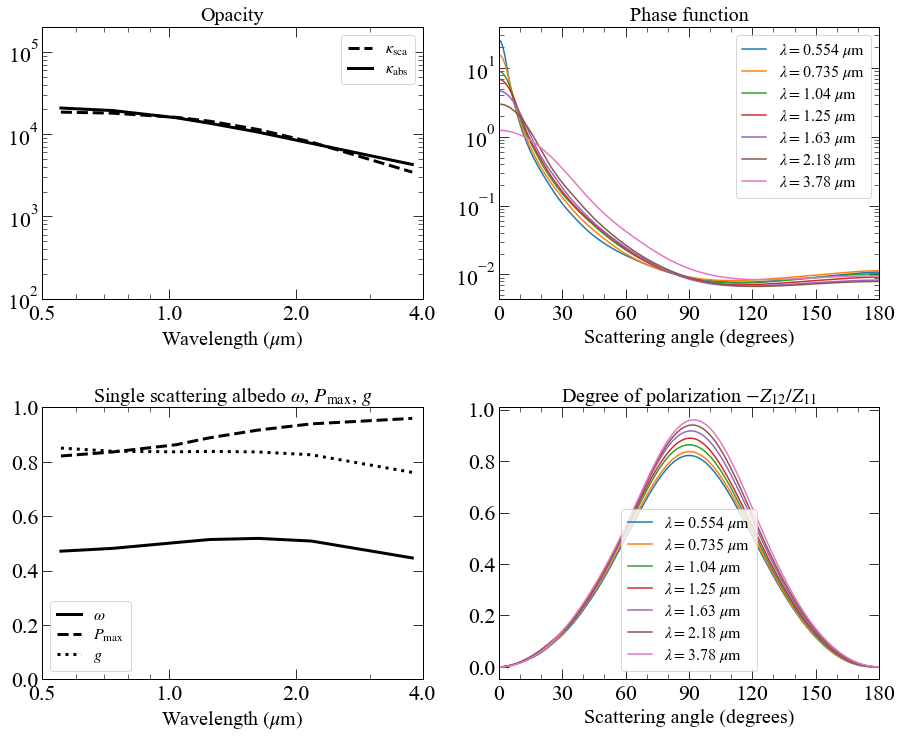

In [5]:
a.showmodel()

### Reading irregular grain models

As with the case of aggregate models, you can also invoke the optical properties of irregular grain models via:

In [6]:
c=dustmodel(partype='grs',size='1_6000',comp='org')

In this case, the `partype` must have `'grs'`. As you can see in the above command, the `size` argument has a bit trickly value. This value represents the volume-equivalent radius of grains in units of microns (the decimal point needs to be replaced by an underscore). Therefore, `size='1_6000'` means that we are calling a model with the volume-equivalent radius $1.6~\mu$m. 

You can check the available input values by typing the following command:

In [7]:
get_sizelist('grs')

['0_2000',
 '0_2520',
 '0_3175',
 '0_4000',
 '0_5040',
 '0_6350',
 '0_8000',
 '1_0079',
 '1_2699',
 '1_6000']

Let's look at the optical properties of the grs model contained in the instance `c`.

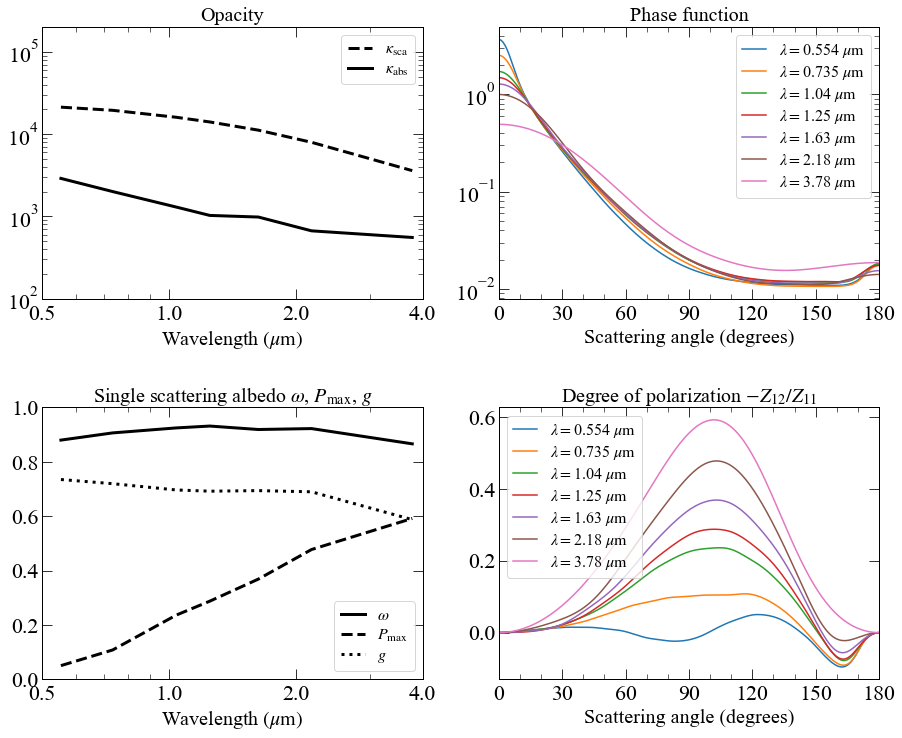

In [8]:
c.showmodel()

### Advanced options: chop and single size

In the default setup, the `dustmodel` class will read a data file **with size distribution and without any forward-scattering chopping**. However, this package also offers files without size distribution and with forward-scattering chopping. 

To read these files, you have to specify two additional arguments: `dist` and `chop` when calling the `dustmodel` class. For example, if you want to switch off the size distribution, you need to set `dist=False` (default: `dist=True`). If you would like to chop forward scattering, you can set either `chop='chop5'` or `chop='chop10'` (default: `chop='nochop'`). Note that the available chop value is either 5 degrees or 10 degrees. 

For example, if you need the optical properties without size distribution and with forward-scattering chopping of 5 degrees, you can type:

In [9]:
c=dustmodel(partype='CAHP',size='4096',amon='100nm',comp='amc',dist=False,chop='chop5')
c.path

'../aggscatrt/single/chop5/dustkapscatmat_CAHP_4096_100nm_amc_chop5.inp'

As you can see here, the path now points to a directory  different from the default one (../aggscatrt/distave/nochop/). Let's see the optical properties in this case:

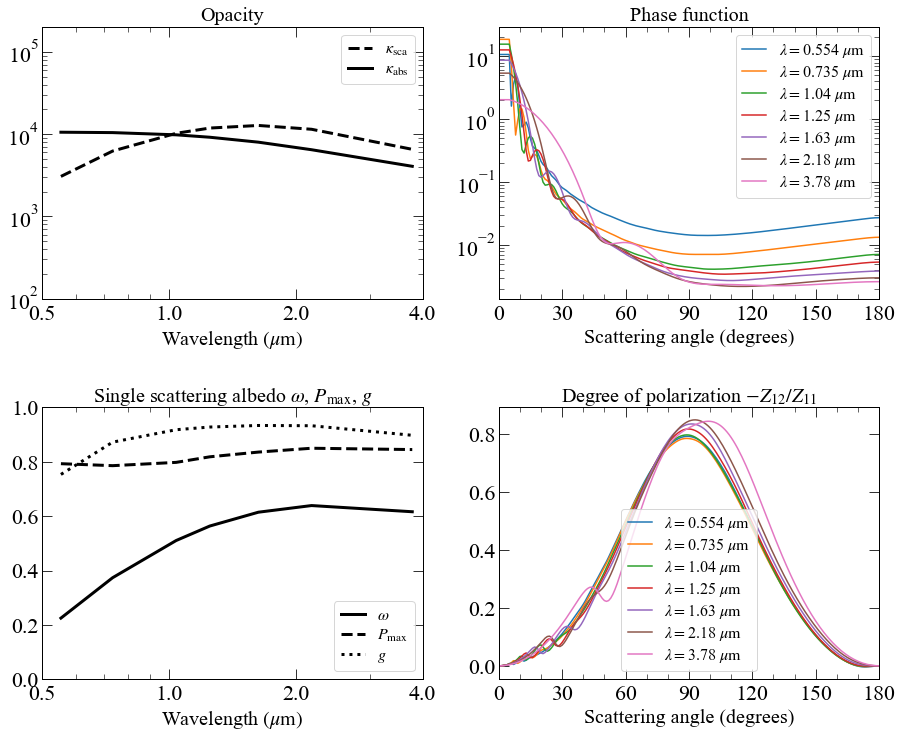

In [10]:
c.showmodel()

In the plots, as expected, the phase function gets flat (chopped) at a scattering angle below 5 degrees. Also, now you can see some wiggles in the phase function, which is absent in the distribution-averaged case.

## Example 1: Comparing different models

Since an instance created by the `dustmodel` class directly stores the values of the physical and optical properties of a specific dust model, you can easily perform a more flexible analysis. 

For example, let's examine how the phase function of aggregates changes with fractal dimension at the $H$ band wavelength ($\lambda=1.63~\mu$m). We consider a fractal dimension of $D_\mathrm{f}=1.1$, $1.3$, $1.5$, and $1.9$.

To do so, first create some lists:

In [24]:
pt=['FA19','FA15', 'FA13','FA11'] # a list of particle types
np=['2048','512', '256','128']      # a list of the number of monomers
label=['$D_f=1.9$','$D_f=1.5$','$D_f=1.3$','$D_f=1.1$'] # a list of labels for lenged

where we have assumed that smaller number of monomers for a lower fractal dimension to approximately fix the aggregate radius. To check the characteristic radius of an aggregate, you can use the `get_radius_and_porosity` function

In [32]:
for i in range(len(pt)):
    ac,por=get_radius_and_porosity(pt[i],'100nm',np[i])
    print('Particle Type: %4s'%pt[i],' Number of monomers = %4s'%np[i],' agg radius = %5.2f um'%ac)

Particle Type: FA19  Number of monomers = 2048  agg radius =  6.72 um
Particle Type: FA15  Number of monomers =  512  agg radius =  6.60 um
Particle Type: FA13  Number of monomers =  256  agg radius =  6.73 um
Particle Type: FA11  Number of monomers =  128  agg radius =  6.56 um


Now we've confirmed that the four aggregates have approximately the same characteristic radius: $a_\mathrm{c}=6.645\pm0.085~\mu$m. Then, let's make a plot of the phase function for those models. 

Reading dust model ...  FA19_Nmax2048_100nm_amc.inp
---> wavelength= 1.63 (um) aggregate radius =  6.72 (um)
Reading dust model ...  FA15_Nmax512_100nm_amc.inp
---> wavelength= 1.63 (um) aggregate radius =  6.60 (um)
Reading dust model ...  FA13_Nmax256_100nm_amc.inp
---> wavelength= 1.63 (um) aggregate radius =  6.73 (um)
Reading dust model ...  FA11_Nmax128_100nm_amc.inp
---> wavelength= 1.63 (um) aggregate radius =  6.56 (um)


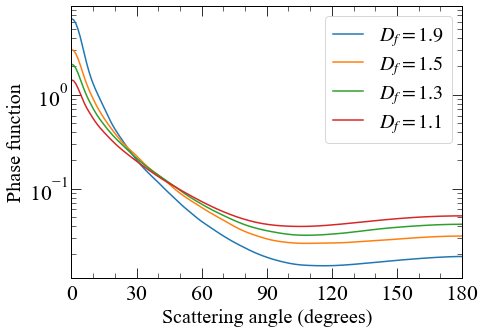

In [34]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(7,5))
ax.set_ylabel('Phase function',fontsize=20)
plots.set_ang_vs_phase(ax)
for i in range(len(pt)):
    a=dustmodel(partype=pt[i],size=np[i],amon='100nm',comp='amc')
    print('Reading dust model ... ',a.model)
    print('---> wavelength=%5.2f (um)'%a.lmd[4], 'aggregate radius = %5.2f (um)'%a.acmax)
    ax.plot(a.scatang,a.z11[4,:]/a.ksca[4],label=label[i])
ax.legend(fontsize=20,loc='best')

## Example 2: Polarization phase function

Let's give you one more example. In this example, we are going to see how the polarization phase function depends on aggregate radius and structure. Similar to the above example, we first make some lists:

In [35]:
np=['8','16','32','64','128','256','512','1024','2048','4096'] # a list of the number of monomers
label=['N=8','16','32','64','128','256','512','1024','2048','4096'] # a list of labels for lenged

Then, read and plot the dust models iteratively in the loop:

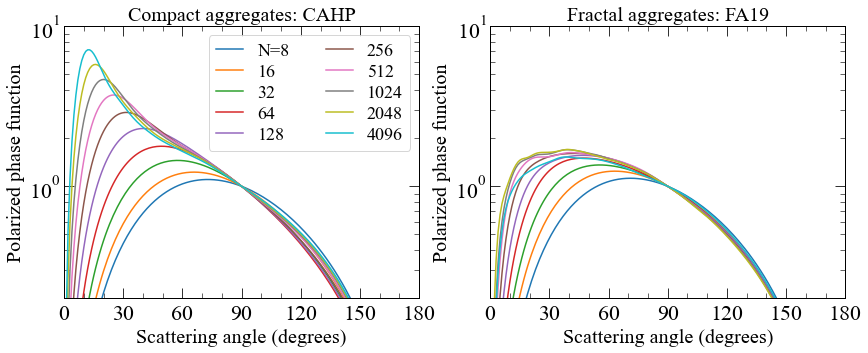

In [14]:
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(14,5))
plots.set_ang_vs_phase(ax1)
plots.set_ang_vs_phase(ax2)
ax1.set_ylabel('Polarized phase function',fontsize=20)
ax1.set_ylim(2.0e-1,10)
ax1.set_title('Compact aggregates: CAHP',fontsize=20)
ax2.set_ylabel('Polarized phase function',fontsize=20)
ax2.set_ylim(2.0e-1,10)
ax2.set_title('Fractal aggregates: FA19',fontsize=20)
for i in range(len(np)):
    a1=dustmodel(partype='CAHP',size=np[i],amon='100nm',comp='org')    
    a2=dustmodel(partype='FA19',size=np[i],amon='100nm',comp='org')    
    ax1.plot(a1.scatang,a1.z12[4,:]/a1.z12[4,90],label=label[i])
    ax2.plot(a2.scatang,a2.z12[4,:]/a2.z12[4,90],label=label[i])
ax1.legend(fontsize=18,ncol=2,loc='best')